<a href="https://colab.research.google.com/github/AnujKAksh89/PlayStoreAnalysis/blob/main/Zomato_Restaurant_Clustering_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Zomato is one of the largest food delivery platforms in the World. In India too, its popularity is enormous. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. Zomato also began grocery delivery amid the COVID-19 outbreak. As of 2019, the service is available in 24 countries and in more than 10,000 cities.

Zomato has an application for rating restaurants. The rating has a review of the restaurant which can be used for sentiment analysis. Based on this, we can discuss the sentiment of the review to be predicted. The data processed has approx 10000 reviews.

Sharing on the internet is something we usually do. Giving a review is also a useful activity so that other people on the internet can find out something else and see opinions about things. The usual things reviewed by someone in the form of experiences, places, objects, and others. Give a review we usually use text to explain something that we experience with an item, place, or event that we normally experience. Customer satisfaction is an opinion between expectation and reality obtained by consumers. Giving a review is also a useful activity so that other customer on the internet can find out something else and see opinions about things and its satisfaction.

Review on Zomato is still in the form of text and can be classified with positive, negative, or neutral with their ratings. Need to extract the words in review and analysis it so we can know how users interact in Zomato and get customers satisfaction by their review. 


# **GitHub Link -**

https://github.com/AnujKAksh89/PlayStoreAnalysis/blob/main/Zomato_Restaurant_Clustering_Sentiment_Analysis.ipynb

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

### Dataset Loading

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_4/Zomato_Restaurant_Clustering_and_Sentiment_Analysis/'
zname_df = pd.read_csv(working_directory + 'Zomato Restaurant names and Metadata.csv')
zreview_df = pd.read_csv(working_directory + 'Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
zname_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
zreview_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
zname_df.shape

(105, 6)

In [ ]:
zreview_df.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
zname_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
zreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
zname_df.duplicated().sum()

0

In [ ]:
zreview_df.duplicated().sum()

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
zname_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

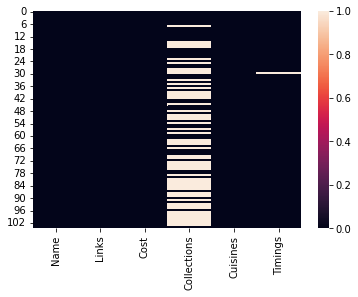

In [ ]:
# Visualizing the missing values
sns.heatmap(zname_df.isnull(), cbar=True)

In [ ]:
zreview_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

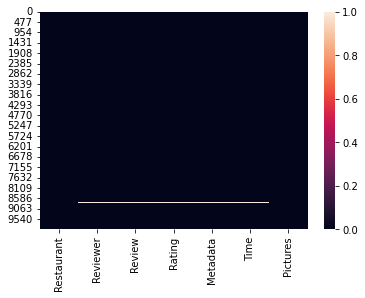

In [ ]:
# Visualizing the missing values
sns.heatmap(zreview_df.isnull(), cbar=True)

### What did you know about your dataset?

The project is about analyzing Zomato Restaurant Review data and building a model that analyse the review text and predict that the review is positive or negative. The two datasets include names of restaurants, per person estimated cost, cuisines served by the restaurants, categories, restaurant timings, reviewer name, review text, ratings, rating datetime, pictures.

## ***2. Understanding Your Variables***

In [ ]:
zname_df.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [ ]:
zreview_df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [ ]:
# Dataset Columns
zname_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
zreview_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
zname_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
zreview_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

#### Zomato Restaurant names and Metadata
1. Name : Name of Restaurants
2. Links : URL Links of Restaurants
3. Cost : Per person estimated Cost of dining
4. Collection : Tagging of Restaurants w.r.t. Zomato categories
5. Cuisines : Cuisines served by Restaurants
6. Timings : Restaurant Timings

#### Zomato Restaurant reviews
1. Restaurant : Name of the Restaurant
2. Reviewer : Name of the Reviewer
3. Review : Review Text
4. Rating : Rating Provided by Reviewer
5. MetaData : Reviewer Metadata - No. of Reviews and followers
6. Time: Date and Time of Review
7. Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
zname_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
zreview_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

### Data Wrangling Code

In [ ]:
# Changing cost function's data type
zname_df['Cost'] =  zname_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
# Changing rating to float
zreview_df.loc[zreview_df['Rating'] == 'Like'] = np.nan
zreview_df['Rating']= zreview_df['Rating'].astype('float64')

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
zreview_df['Reviews'], zreview_df['Followers'] = zreview_df['Metadata'].str.split(',').str
zreview_df['Reviews'] = pd.to_numeric(zreview_df['Reviews'].str.split(' ').str[0])

In [ ]:
zreview_df = zreview_df.drop(['Metadata'], axis =1)

In [ ]:
# Converting Time column into Time, Year, Month, Hour
zreview_df['Time'] = pd.to_datetime(zreview_df['Time'])
zreview_df['Year'] = pd.DatetimeIndex(zreview_df['Time']).year
zreview_df['Month'] = pd.DatetimeIndex(zreview_df['Time']).month
zreview_df['Hour'] = pd.DatetimeIndex(zreview_df['Time']).hour

In [ ]:
# Top 10 costly Restaurants
top_10_costly = zname_df[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

In [ ]:
# Top 10 affordable Restaurants
top_10_affordable = zname_df[['Name', 'Cost']].groupby('Name', as_index=False).sum().sort_values(by='Cost',ascending=True).tail(10)

In [ ]:
# Top 15 reviewers
reviewer_list = zreview_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]

In [ ]:
# Review per hour
reviews_hour = zreview_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

In [ ]:
# Average of the ratings of reviewers with review count
review_ratings = zreview_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings = pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings = review_ratings[:15]
top_reviewers_ratings = top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)

In [ ]:
# Removing stopwords from Cuisines
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda text: stopwords(text))
zname_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [ ]:
# Removing punctuations from Cuisines
new_df = zname_df.copy()
new_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x: remove_punctuation(x))
new_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
# Removing repeating characters from Cuisines
new_df['Cuisines'] = new_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
new_df['Cuisines'] = new_df['Cuisines'].apply(lambda x: cleaning_numbers(x))

In [ ]:
from collections import Counter 
text = ' '.join(new_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [ ]:
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

In [ ]:
avg_hotel_rating = zreview_df.groupby('Restaurant').agg({'Rating':'mean', 'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})

In [ ]:
new_df2 = zname_df.copy()
new_df2.rename(columns={'Name':'Restaurant'}, inplace=True)
merged_df = new_df2.merge(zreview_df, on='Restaurant')
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean', 'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [ ]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [ ]:
#price point for Low rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


### What all manipulations have you done and insights you found?

First changed Cost to numerical features. Created two features Followers and Reviews from Metadata and later removed Metadata from the dataset.

Following new features have been created from Time:
* Time: Review time
* Year: Review year
* Month: Review month
* Hour: Review hour

Cleaned and filtered Cuisines values for further process.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

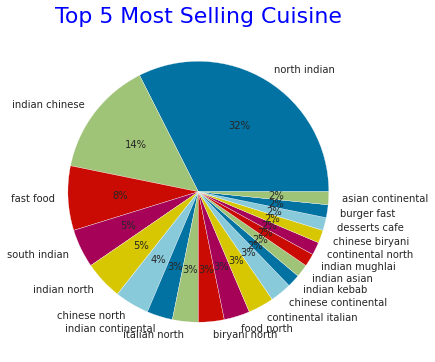

In [ ]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.pie(x, labels = y, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

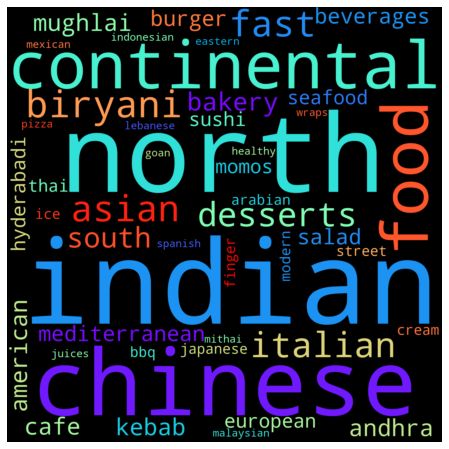

In [ ]:
#wordcloud for Cuisine
# Creating word_cloud with text as argument in .generate() method
plt.figure(figsize=(15,8))
text = " ".join(name for name in zname_df.Cuisines )
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False, colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data. The slices of pie are called wedges. The area of the wedge is determined by the length of the arc of the wedge. The area of a wedge represents the relative percentage of that part with respect to whole data. Pie charts are commonly used in business presentations like sales, operations, survey results, resources, etc as they provide a quick summary.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

I've choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that most of the hotel serve North Indian food followed by Chinese and Fast Food.

##### 3. Will the gained insights help creating a positive business impact?

Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options. If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.

Businesses can identify from above charts which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

#### Chart - 2

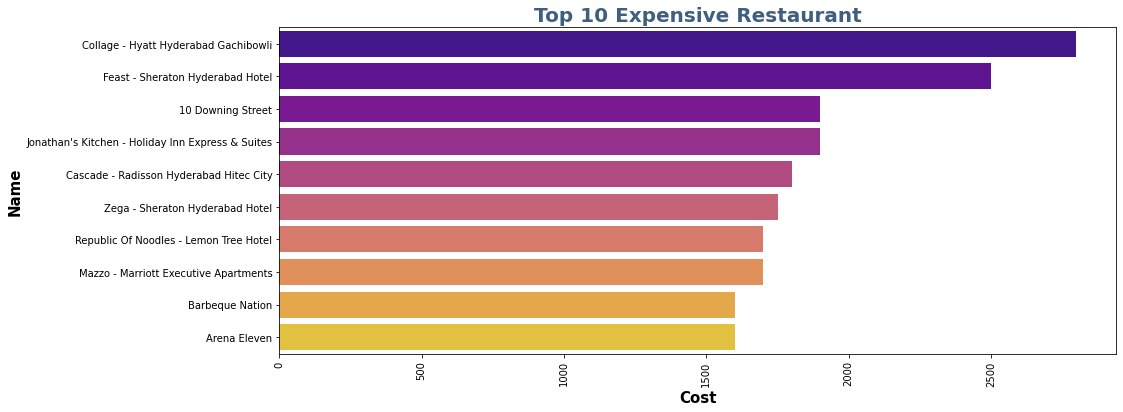

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
x = top_10_costly['Cost']
y = top_10_costly['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

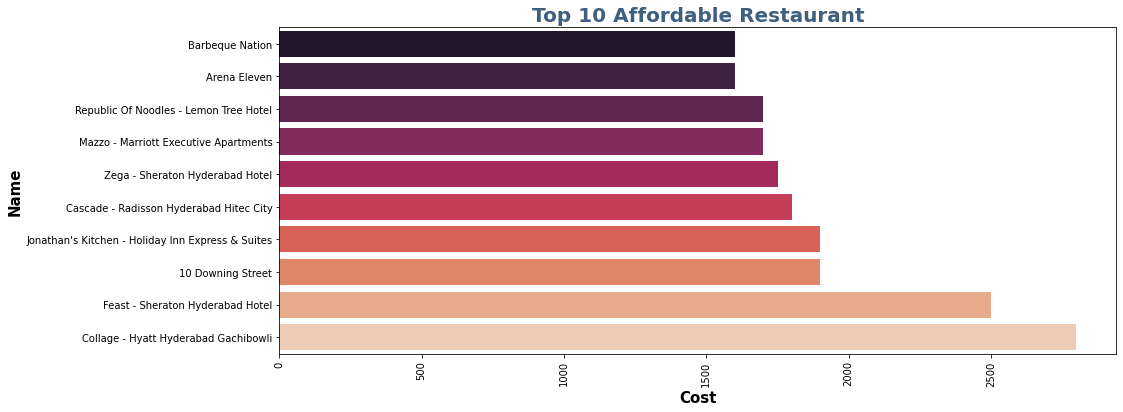

In [ ]:
plt.figure(figsize=(15,6))
x = top_10_affordable['Cost']
y = top_10_affordable['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y, palette='rocket')
plt.show()

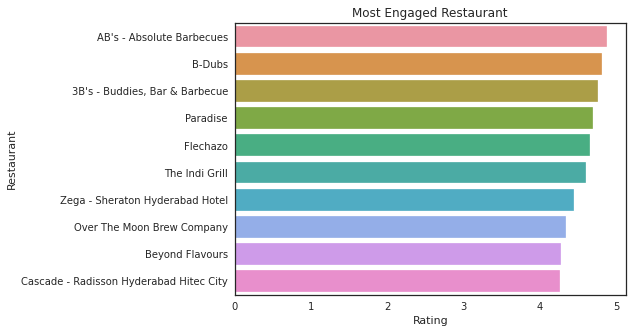

In [ ]:
plt.figure(figsize=(7,5))
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

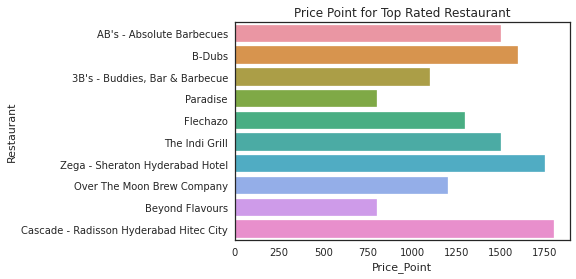

In [ ]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

Text(0.5, 0, 'Ratings')

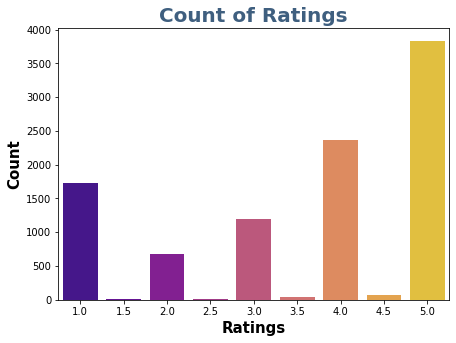

In [ ]:
# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(zreview_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

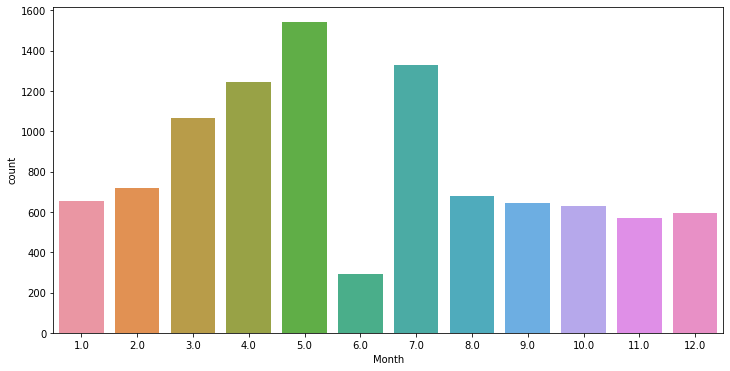

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(zreview_df.Month)

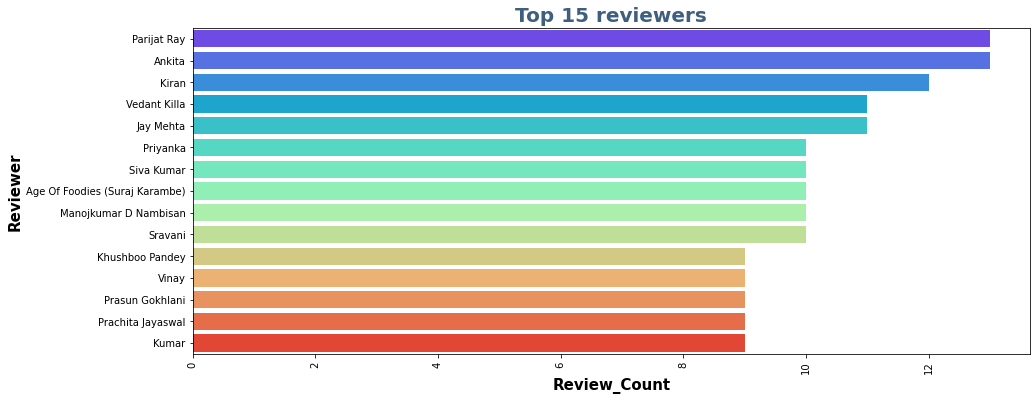

In [ ]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

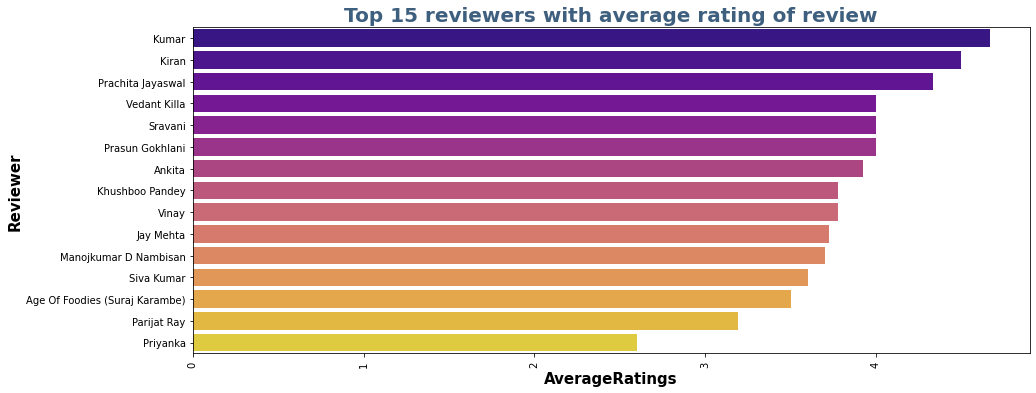

In [ ]:
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

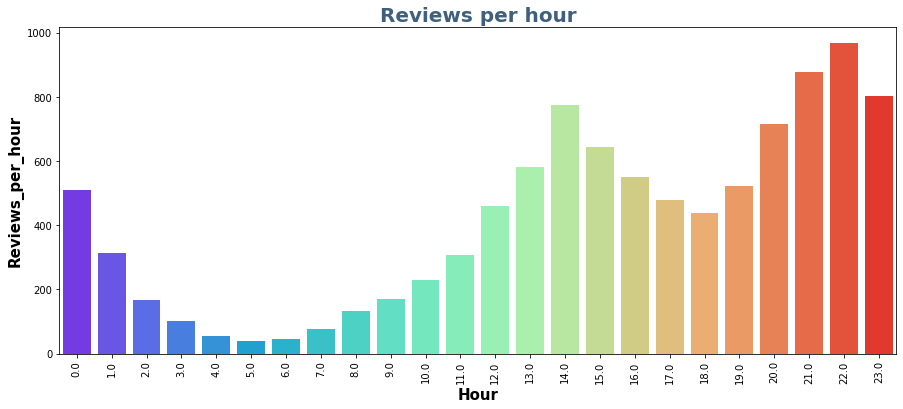

In [ ]:
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

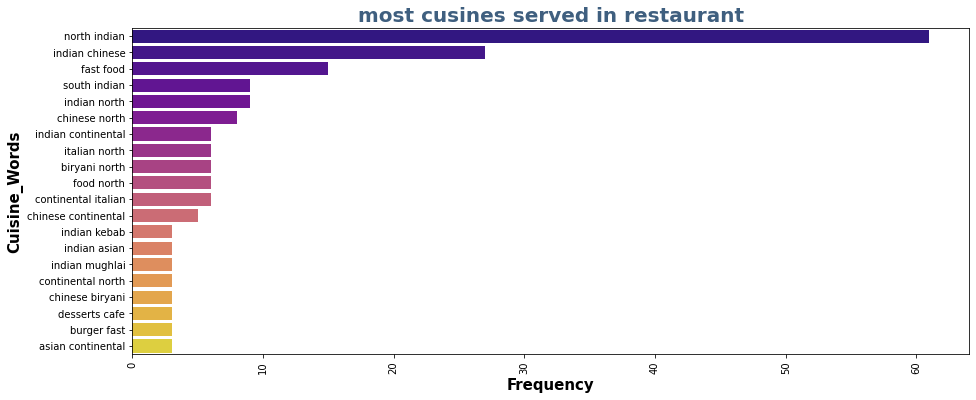

In [ ]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Following are the insights from above charts:
* Most expensive hotel is Collage - Hyatt Hyderabad Gachibowli followed by Feast - Sheraton Hyderabad Hotel and 10 Downing Street.
* Most affordable hotels is Barbeque Nation followed by Arena Eleven and Republic of Boodle - Lemon Tree Hotel.
* Most rated hotel is AB's - Absolute Barbecues followed by B-Dubs and 3B's - Buddies, Bar & Barbecue.
* Most of the reviewers have given rating of 5 followed by 4 and 1.
* Highest number of reviews in the month of May followed by July and April.
* There is an increment in reviews from th month of January to May and after that decrement upto December.
* There is an increase of reviews made from the afternoon to the midnight and then in the morning there is a decrease
* Most served cuisine North Indian followed by Indian Chinese and Fast Food.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market. Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.
* Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others. Also cost and ratings are keys taking part in business success. Hotels can review these details and plan accordingly to get success.

#### Chart - 3

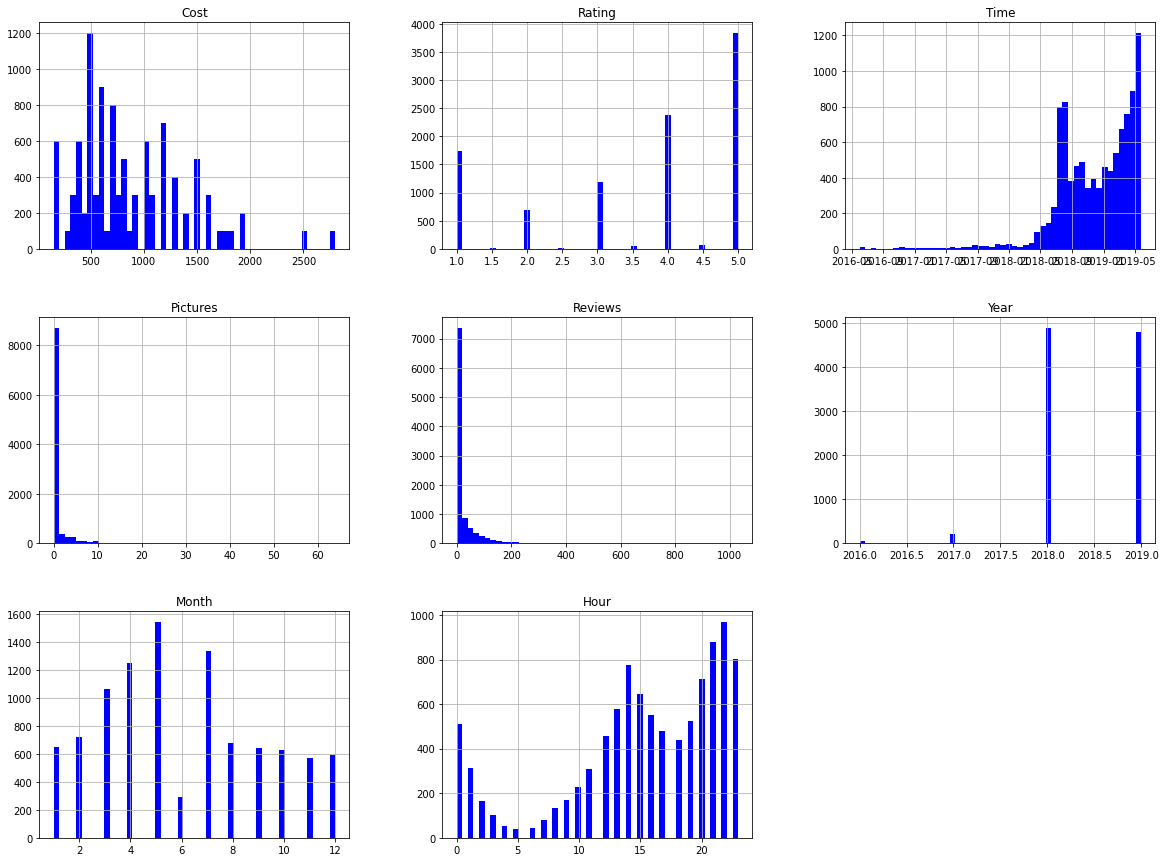

In [ ]:
#frequency distribution using histgram
merged_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are visualization tools that represent the distribution of a set of continuous data. In a histogram, the data is divided into a set of intervals or bins (usually on the x-axis) and the count of data points that fall into each bin corresponding to the height of the bar above that bin.

I've used this plot to visualize frequency disribution of the features.

##### 2. What is/are the insight(s) found from the chart?

When cost range vary from 200 to 2700, maximum restaurant show price range for 500.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Price always place important role in any business alongwith rating which show how much engagement are made for the product. Howevenr, not seeing much help for businesses from the above chart.

#### Chart - 4

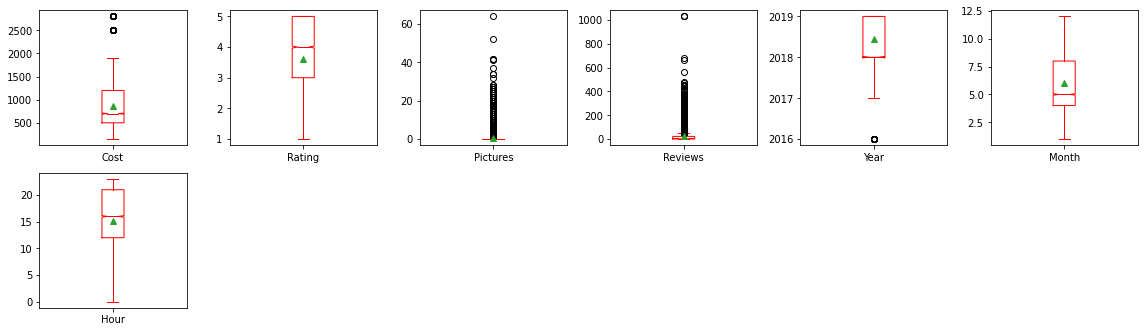

In [ ]:
# Chart - 3 visualization code
merged_df.plot(kind = 'box', subplots = True, notch=True, showmeans=True, layout = (4,6), figsize = (16,9), color = 'red')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

From the box plot it is clearly visible that there are no outliers in the dataset which may affect the result further.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Pair Plot 

In [ ]:
zcopy = zname_df.copy()
zcopy.rename(columns = {'Name':'Restaurant'}, inplace = True)

In [ ]:
merged_df = pd.merge(zcopy, zreview_df, on="Restaurant")

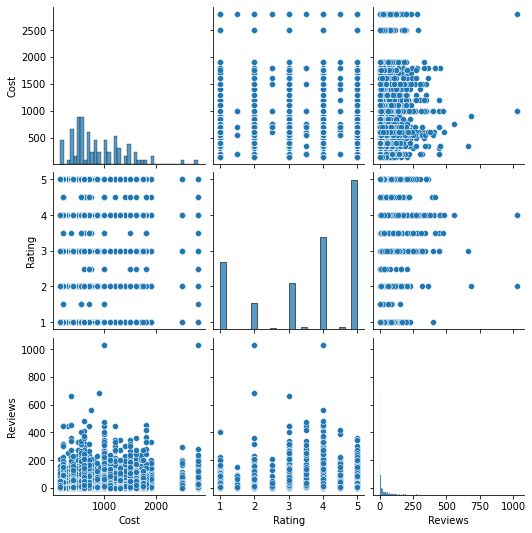

In [ ]:
# Pair Plot visualization code
n = ['Cost', 'Rating', 'Followers', 'Reviews']
sns.pairplot(merged_df[n])
plt.show()

##### 1. Why did you pick the specific chart?

To plot multiple pairwise bivariate distributions in a dataset, we use pair plot. The diagonal plots are the univariate plots, and this displays the relationship for the (n, 2) combination of variables in a DataFrame as a matrix of plots.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Rating is positively correlated with the cost of restaurants.
* Restaurants reviewed by reviewers with more followers have a higher rating.
* Restaurants offering wider variety of cuisines have higher rating.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Rating is positively correlated with the cost of restaurants.

Null Hypothesis H0: 𝛽1 = 0

Alternate Hypothesis H1: 𝛽1 > 0

Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Null Hypothesis rejected Successfully for p = 4.595644071499098e-47


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and their rating.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Restaurants reviewed by reviewers with more followers have a higher rating.

Null Hypothesis H0: 𝛽2 = 0

Alternate Hypothesis H1: 𝛽2 > 0

Test: Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Followers', data = merged_df).fit()

# extract p-value of coefficient for Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Failed to reject the Null Hypothesis for p = 0.29685097282805173.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between reviewers followers and their rating.

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Restaurants offering wider variety of cuisines have higher rating.

Null Hypothesis H0: 𝛽3 = 0

Alternate Hypothesis H1: 𝛽3 > 0

Test: Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p_value < 0.05:
    print(f"Null Hypothesis rejected Successfully for p = {p_value}")
else:
    print(f"Failed to reject the Null Hypothesis for p = {p_value}.")

Failed to reject the Null Hypothesis for p = 0.29685097282805173.


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
print(zreview_df['Rating'].mean())

3.601044071880333


In [ ]:
# Replacing followers and reviews null values into 0
zreview_df['Rating'].fillna(3.6, inplace=True)
zreview_df['Followers'].fillna(0,inplace=True)
zreview_df['Reviews'].fillna(0,inplace=True)

In [ ]:
# Dropping the remaining missing data
zreview_df.dropna(inplace=True)
zreview_df.reset_index(inplace = True)

In [ ]:
#filling null value in timings column
zname_df.Timings.fillna(zname_df.Timings.mode()[0], inplace = True)

In [ ]:
#dropping collection column since has more than 50% of null values
zname_df.drop('Collections', axis = 1, inplace = True)

In [ ]:
#filling null values in review and reviewer follower column
zreview_df = zreview_df.fillna({"Review": "No Review", "Followers": 0, "Reviews":0})

In [ ]:
#dropping rest of the null values
zreview_df = zreview_df.dropna(subset=['Restaurant','Reviewer'])

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Filled null values in Rating with mean rating 3.6.
* Filled null values in Followers and Reviews with 0.
* Replaced null value in Timings with mode.
* Replaced null values in Review with "No Review" and null values in Followers with 0.
* Dropped rest of the null values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outliers visible in the dataset may not be ill-effective, hence not treating outliers.

### 3. Categorical Encoding

In [ ]:
#new df with important categories
cluster_df = zname_df[['Name','Cuisines']]
cluster_df.rename(columns = {'Name':'Restaurant'}, inplace = True)
#spliting cuisines as they are separted with comma and converting into list
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_df = cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_df.loc[:, cluster_df.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_df.columns = cluster_df.columns.str.replace("Cuisines_","")

#grouping each restaurant as explode created unnecessary rows
cluster_df = cluster_df.groupby("Restaurant").sum().reset_index()

In [ ]:
#total cuisine count 
merged_df['Total_Cuisine_Count'] = zname_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
#adding cost column to the new dataset 
cluster_df = merged_df[['Restaurant','Cost','Rating','Total_Cuisine_Count']].merge(cluster_df, on = 'Restaurant')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine feature, based on the cuisine if present given value 1 and if not present given value 0. One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering. One-hot encoding can also handle categorical features with a high cardinality, which can be useful when there are many unique categories. One-hot encoding can also handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels. One-hot encoding can also handle missing values by creating a new category for them. One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable. One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
zreview_df['Review'] = zreview_df['Review'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
zreview_df['Review'] = review
review = remove_non_leters(review)
# storing the reviews in a feature of df
zreview_df['Review'] = zreview_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
zreview_df['Review'] = zreview_df['Review'].apply(stopwords)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
review = zreview_df.Review
review = lemmatization_(review)

In [ ]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
# Remove White spaces
review = remove_spaces(review)

#### 6. Sentiment Analysis

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [ ]:
# Function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
# Creating two new columns from Review
zreview_df['Subjectivity'] = zreview_df['Review'].apply(subjectivity)
zreview_df['Polarity'] = zreview_df['Review'].apply(polarity)

In [ ]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
zreview_df['Analysis'] = zreview_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(zreview_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [ ]:
# Converting Analysis into numeric form Postive=1 and Negative=0
def sentiment(analysis):
  if analysis == 'Positive':
    return 1
    # positive sentiment
  elif analysis == 'Neutral' :
    return 0
    # neutral sentiment
  else:
    return 0
    # neagative sentiment

In [ ]:
zreview_df['Analysis'] = zreview_df['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
sentiment_df = zreview_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [ ]:
# Top 10 Restaurants with rating and count of votes
ratings_data = pd.DataFrame(zreview_df.groupby('Restaurant')['Rating'].mean())
ratings_data['Number of votes'] = zreview_df.groupby('Restaurant')['Rating'].count()
ratings_data.sort_values(by=['Rating'], ascending=False).head(10)

,Rating,Number of votes
Restaurant,,
AB's - Absolute Barbecues,4.88,100
B-Dubs,4.81,100
"3B's - Buddies, Bar & Barbecue",4.76,100
Paradise,4.70,100
Flechazo,4.66,100
The Indi Grill,4.60,100
Zega - Sheraton Hyderabad Hotel,4.45,100
Over The Moon Brew Company,4.34,100
Beyond Flavours,4.28,100


In [ ]:
# Number of restaurants with good rating
ratings_data[ratings_data.Rating > 4].count() 

Rating             18
Number of votes    18
dtype: int64

#### 7. Rephrase Text

In [ ]:
# Rephrase Text

#### 8. Tokenization

In [ ]:
# Tokenization

#### 9. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Part of speech tagging

In [ ]:
# POS Taging

#### 11. Text Vectorization

In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
# Vectorizing Text
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique. TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf). The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative. It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on. Other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

##### What data splitting ratio have you used and why? 

I have used 75:25 split which is one the most used split ratio. Since there is not much data, taking more data in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### ML Model - 1 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy = 0.8155885897950984
ROC Area under Curve = 0.5064516129032258
Time taken = 0.5465607643127441
              precision    recall  f1-score   support

           0    0.81514   1.00000   0.89816      2024
           1    1.00000   0.01290   0.02548       465

    accuracy                        0.81559      2489
   macro avg    0.90757   0.50645   0.46182      2489
weighted avg    0.84968   0.81559   0.73512      2489



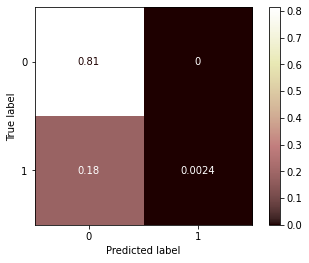

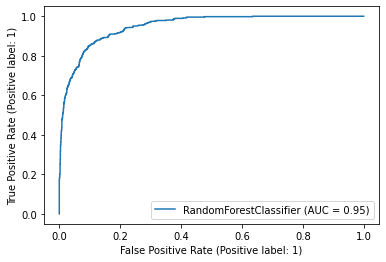

In [ ]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

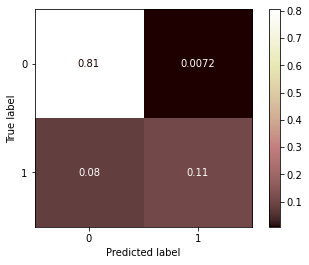

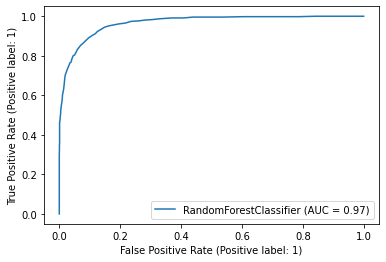

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')
# Fit the Algorithm
rf_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(rf_model, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the below table improvement signimifcant improvement is clearly visible.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Without Hyperparameter Tuning", "After Hyperparameter Tuning"])
train.add_row(['1','Time Taken','0.73 min', '3.56 min'])
train.add_row(['2','Accuracy','0.81', '0.90'])
train.add_row(['3','Precision','0.81','0.90'])
train.add_row(['4','Recall','1.00','1.00'])
train.add_row(['5','F1-Score','0.90','0.94'])
train.add_row(['6','ROC_AUC','0.50','0.75'])
print(train)

+-------+------------+-------------------------------+-----------------------------+
| SL NO |  Metrices  | Without Hyperparameter Tuning | After Hyperparameter Tuning |
+-------+------------+-------------------------------+-----------------------------+
|   1   | Time Taken |            0.73 min           |           3.56 min          |
|   2   |  Accuracy  |              0.81             |             0.90            |
|   3   | Precision  |              0.81             |             0.90            |
|   4   |   Recall   |              1.00             |             1.00            |
|   5   |  F1-Score  |              0.90             |             0.94            |
|   6   |  ROC_AUC   |              0.50             |             0.75            |
+-------+------------+-------------------------------+-----------------------------+


### ML Model - 2 Extreme Gradient Boosting

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy = 0.9421454399357172
ROC Area under Curve = 0.8824317863062603
Time taken = 58.574756383895874
              precision    recall  f1-score   support

           0    0.95236   0.97777   0.96490      2024
           1    0.89051   0.78710   0.83562       465

    accuracy                        0.94215      2489
   macro avg    0.92143   0.88243   0.90026      2489
weighted avg    0.94080   0.94215   0.94074      2489



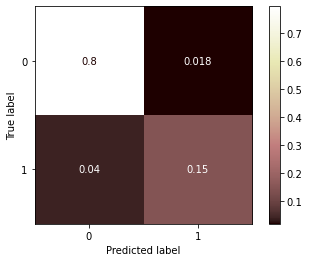

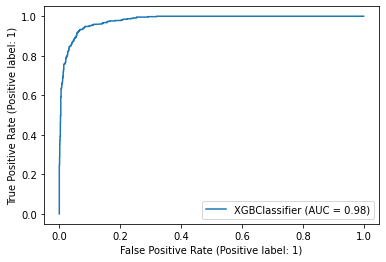

In [ ]:
# Visualizing evaluation Metric Score chart
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}
# Fit the Algorithm
model_xgb = xgb.XGBClassifier(**params_xgb)
# Predict on the model
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_sam

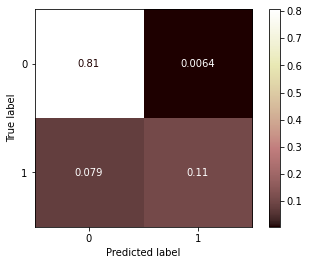

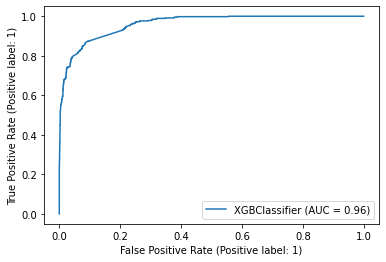

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Create an instance of the RandomForestClassifier
xg_model = xgb.XGBClassifier()
# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_grid1.predict(X_train)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(xg_model, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the below table it is beeing observed that hyperparameter tuning is not helping in case of XGBoost.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Without Hyperparameter Tuning", "After Hyperparameter Tuning"])
train.add_row(['1','Time Taken','1.20 min', '2.96 min'])
train.add_row(['2','Accuracy','0.94', '0.91'])
train.add_row(['3','Precision','0.94','0.91'])
train.add_row(['4','Recall','0.99','0.99'])
train.add_row(['5','F1-Score','0.96','0.98'])
train.add_row(['6','ROC_AUC','0.87','0.78'])
print(train)

### ML Model - 3 Support Vector Machine

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy = 0.9421454399357172
ROC Area under Curve = 0.8824317863062603
Time taken = 59.30214762687683
              precision    recall  f1-score   support

           0    0.95236   0.97777   0.96490      2024
           1    0.89051   0.78710   0.83562       465

    accuracy                        0.94215      2489
   macro avg    0.92143   0.88243   0.90026      2489
weighted avg    0.94080   0.94215   0.94074      2489



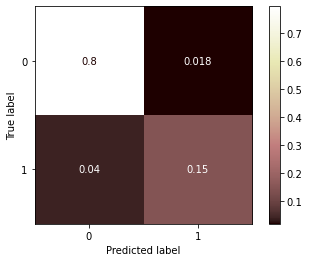

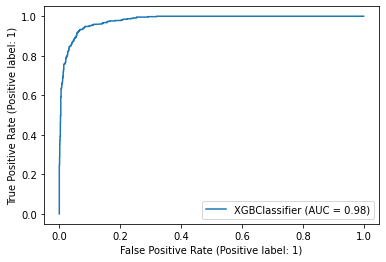

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn import svm
svm_clf = svm.SVC(probability=True)
# Fit the Algorithm
model_svm = svm_clf.fit(X_train, y_train)
# Predict on the model
model_svm, accuracy_svm, roc_auc_svm, tt_svm = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   4.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   4.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   4.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   4.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.962 total time=   4.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   3.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   3.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   5.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   4.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   3.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.955 total time=   3.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

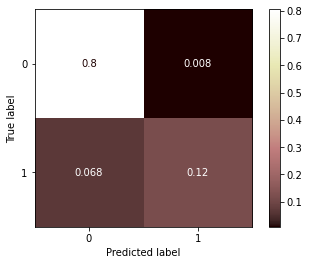

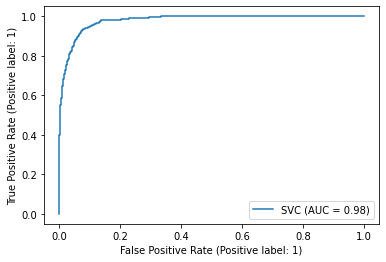

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
svm_model = SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, refit = True, verbose = 3, scoring='roc_auc')
# Fit the Algorithm
avm_grid1 = svm_grid.fit(X_train,y_train)
# Predict on the model
train_class_preds_svm = xg_grid1.predict(X_train)
model_svm, accuracy_svm, roc_auc_svm, tt_svm = run_model(svm_model, X_train, y_train, X_test, y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From below table it is observed that hyperparameter tuning did not help in case of SVM.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Without Hyperparameter Tuning", "After Hyperparameter Tuning"])
train.add_row(['1','Time Taken','1.15 min', '7.57 min'])
train.add_row(['2','Accuracy','0.94', '0.92'])
train.add_row(['3','Precision','0.94','0.92'])
train.add_row(['4','Recall','0.98','0.99'])
train.add_row(['5','F1-Score','0.96','0.95'])
train.add_row(['6','ROC_AUC','0.87','0.81'])
print(train)

+-------+------------+-------------------------------+-----------------------------+
| SL NO |  Metrices  | Without Hyperparameter Tuning | After Hyperparameter Tuning |
+-------+------------+-------------------------------+-----------------------------+
|   1   | Time Taken |            1.15 min           |           7.57 min          |
|   2   |  Accuracy  |              0.94             |             0.92            |
|   3   | Precision  |              0.94             |             0.92            |
|   4   |   Recall   |              0.98             |             0.99            |
|   5   |  F1-Score  |              0.96             |             0.95            |
|   6   |  ROC_AUC   |              0.87             |             0.81            |
+-------+------------+-------------------------------+-----------------------------+


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall, Precision, f1_score and AUC - ROC.

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will not recommend but the customer did recommend. Again false negative defines as model will predict that the customer recommend but the customer didn't recommend. That will be an issue for us. So, for that case we have to minimize the false negative. And, false positive we must improve the score of both precision as well as recall. So, in our case recall will stand the higher but precision can't be neglected. so, recall should be higher and f1_score should be moderate.

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Extreme Gradient Boostin (XGB) and Support Vector Machine (SVM) both without hyperparameter tuning are found to be faster and fitter models as we can see in below table and chart. We can see there are similar kind of results from both of the models. However, SVM is fatser that XGB by few second. So, any of these models can be used. I'll use SVM from these two.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Extreme Gradient Boosting", "Support Vector Machine"])
train.add_row(['1','Time Taken','77 sec', '64 sec'])
train.add_row(['2','Accuracy','0.94', '0.94'])
train.add_row(['3','Precision','0.94','0.94'])
train.add_row(['4','Recall','0.98','0.98'])
train.add_row(['5','F1-Score','0.96','0.96'])
train.add_row(['6','ROC_AUC','0.87','0.87'])
print(train)

+-------+------------+---------------------------+------------------------+
| SL NO |  Metrices  | Extreme Gradient Boosting | Support Vector Machine |
+-------+------------+---------------------------+------------------------+
|   1   | Time Taken |           77 sec          |         64 sec         |
|   2   |  Accuracy  |            0.94           |          0.94          |
|   3   | Precision  |            0.94           |          0.94          |
|   4   |   Recall   |            0.98           |          0.98          |
|   5   |  F1-Score  |            0.96           |          0.96          |
|   6   |  ROC_AUC   |            0.87           |          0.87          |
+-------+------------+---------------------------+------------------------+


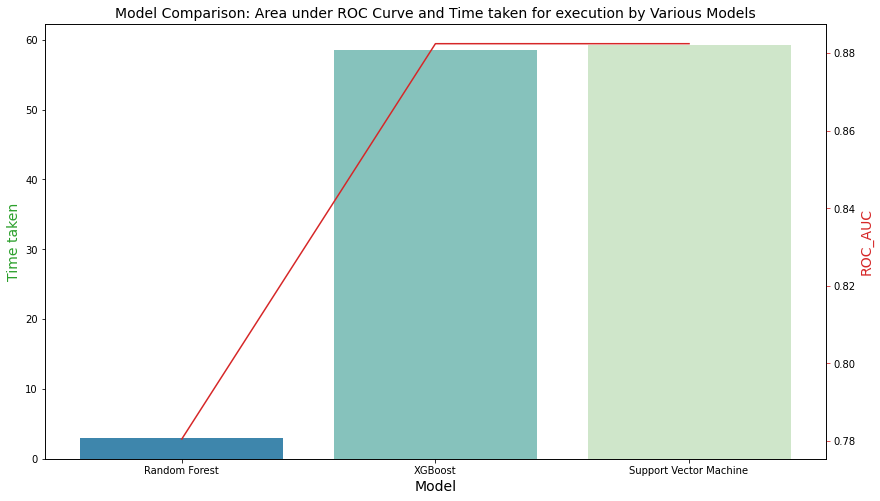

In [ ]:
roc_auc_scores = [roc_auc_rf, roc_auc_xgb, roc_auc_svm]
tt = [tt_rf, tt_xgb, tt_svm]

model_data = {'Model': ['Random Forest','XGBoost','Support Vector Machine'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 30.6 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import VotingClassifier
import shap 
import graphviz

In [ ]:
#Get shap values
explainer = shap.Explainer(model_svm)
shap_values = explainer(X_test) 

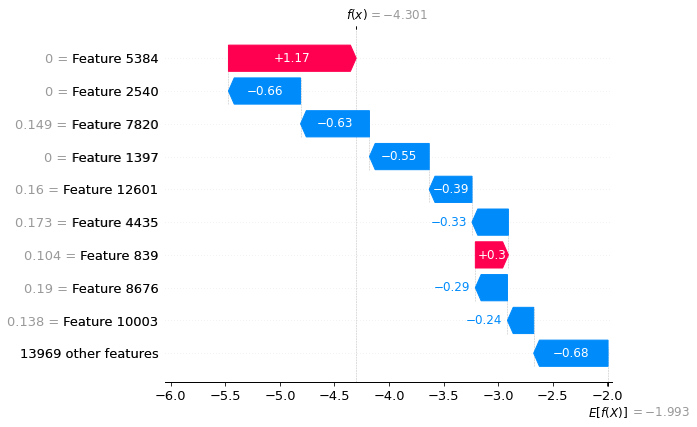

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

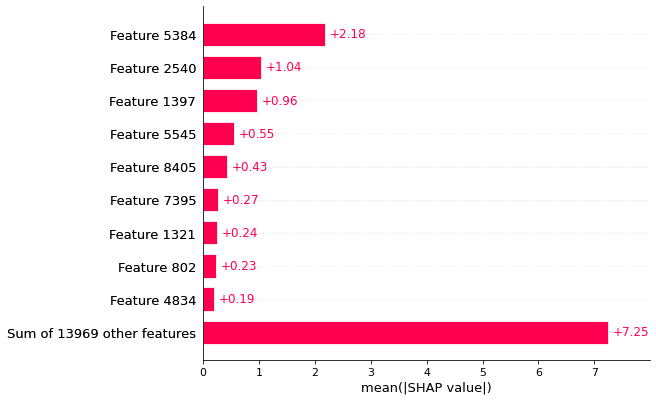

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

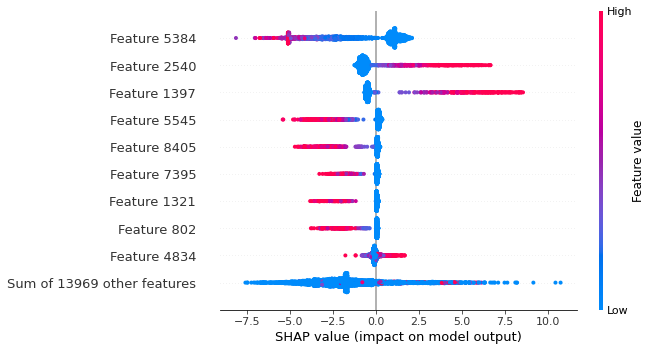

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

## ***8.*** ***LDA (Clustering)***

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c2c6c1d55973c131b5b070195ed42610abd30cc7fc0e69f82ba17a8316061d9b
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=856016620bace797bf481bbb6b2e0a8c900e732c16413cfd53281d61fbac42f8
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [ ]:
docs_raw = zreview_df['Review'].tolist()

In [ ]:
#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 

In [ ]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [ ]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], zreview_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9954, 136), meaning that there are 9954 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappoint we food courteous staff...
9951    bad rating mainly chicken bone find veg food a...
9952    personally love prefer chinese food couple tim...
9953    check try delicious chinese food see nonveg lu...
Name: Review, Length: 9954, dtype: object and 136 tokens made through the filtering process.


In [ ]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}

In [ ]:
# Init the Model
lda = LatentDirichletAllocation()

In [ ]:
model = GridSearchCV(lda, param_grid=search_params)

In [ ]:
model.fit(dtm_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

In [ ]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.265280 -0.273347       1        1  24.750932
0      0.375812 -0.184549       2        1  23.835204
4      0.028179  0.307092       3        1  19.208524
2     -0.045474  0.047089       4        1  17.512686
3     -0.093238  0.103715       5        1  14.692654, topic_info=              Term        Freq       Total Category  logprob  loglift
111     restaurant  629.000000  629.000000  Default  30.0000  30.0000
60      experience  615.000000  615.000000  Default  29.0000  29.0000
64      gachibowli  271.000000  271.000000  Default  28.0000  28.0000
42      definitely  256.000000  256.000000  Default  27.0000  27.0000
56      especially  209.000000  209.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
77      innovative   11.195732   11.963811   Topic5  -4.3275   1.8515
79      interested   10.981632   11.748651   Topic5  -4.3468   1.8503
5      accordingly   10.208611   10.977773   Topic5  -4.4198   1.8452
115  sophisticated    9.167400    9.937436   Topic5  -4.5274   1.8372
34      compromise   12.708753   13.826380   Topic5  -4.2008   1.8335

[197 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.986069      absolutely
1         5  0.947366      acceptable
2         2  0.887366      accessible
3         2  0.709380     accommodate
3         4  0.253350     accommodate
...     ...       ...             ...
131       4  0.970934   unfortunately
132       5  0.980690      unhygienic
133       3  0.977763  unprofessional
134       2  0.991542      vegetarian
135       2  0.896708     vegetarians

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

#### Clustering

In [ ]:
# converting the cuisines to lower case
zname_df['Cuisines'] = zname_df['Cuisines'].apply(lambda x : x.lower())

In [ ]:
cuisine_df = zname_df.loc[:,['Name', 'Cost', 'Cuisines']]

In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,[chinesecontinentalkebabeuropeansouthindiannor...
1,Paradise,800,[biryaninorthindianchinese]
2,Flechazo,1300,[asianmediterraneannorthindiandesserts]
3,Shah Ghouse Hotel & Restaurant,800,[biryaninorthindianchineseseafoodbeverages]
4,Over The Moon Brew Company,1200,[asiancontinentalnorthindianchinesemediterranean]


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

In [ ]:
# one hot encoded labels for each type of cuisines and dropping the cuisine column
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [ ]:
# There was one rating 'Like' so we can change it into 4
zreview_df['Rating'] = zreview_df['Rating'].replace('Like', '4')

In [ ]:
# Change data type of rating column to float
zreview_df['Rating'] = zreview_df['Rating'].astype('float')

In [ ]:
zreview_df.dropna(subset =['Review'], inplace=True)

In [ ]:
# Creating a new df to get the average ratings for each Restaurant
ratings_df  = zreview_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df.sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [ ]:
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 96 columns):
 #   Column                                                 Non-Null Count  Dtype           
---  ------                                                 --------------  -----           
 0   Name                                                   100 non-null    object          
 1   Cost                                                   100 non-null    int64           
 2   american                                               100 non-null    Sparse[int64, 0]
 3   americanchinesenorthindiankebabsouthindian             100 non-null    Sparse[int64, 0]
 4   americanfastfoodsaladburger                            100 non-null    Sparse[int64, 0]
 5   americanwrapsdesserts                                  100 non-null    Sparse[int64, 0]
 6   andhrabiryanihyderabadinorthindian                     100 non-null    Sparse[int64, 0]
 7   andhranorthindianchinese                              

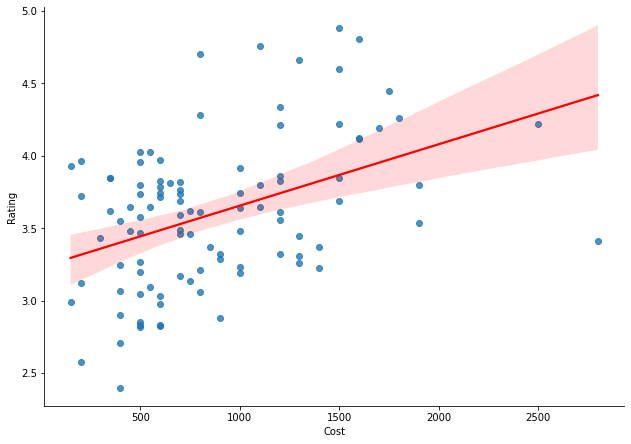

In [ ]:
df_cluster['Cost'] = df_cluster['Cost'].astype('float')
sns.lmplot(y='Rating', x='Cost', data=df_cluster, line_kws={'color' :'red'}, height=6.27, aspect=11.7/8.27)

#### K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

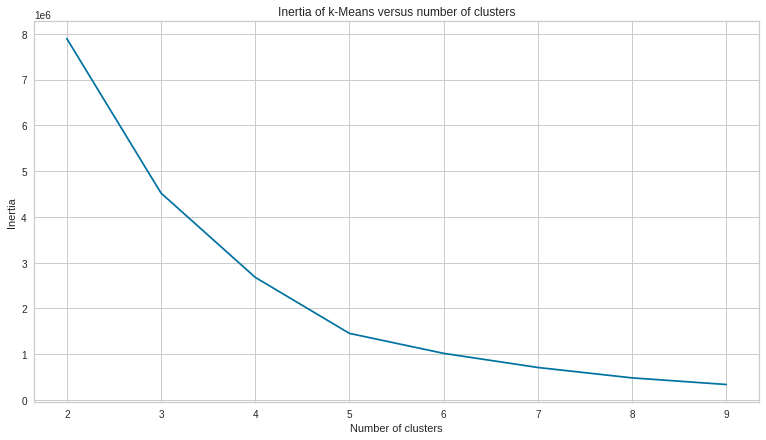

In [ ]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop(['Name', 'Restaurant'],axis =1)).inertia_ for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
# From the above chart it seems cluster 5 is best
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop(['Name', 'Restaurant'],axis=1))

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_lbl = model.predict(df_cluster.drop(['Name', 'Restaurant'],axis=1))

Text(0.5, 0, 'Cost')

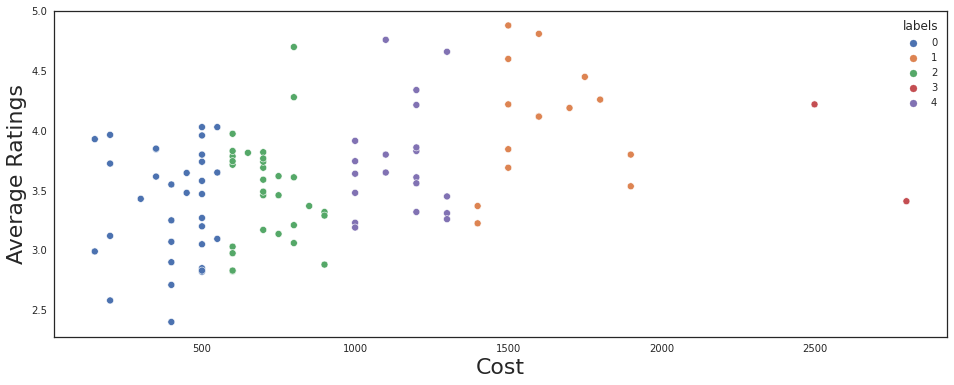

In [ ]:
df_cluster['labels'] = cluster_lbl
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

In [ ]:
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels','Restaurant'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian                      3
icecreamdesserts                 2
southindiannorthindianchinese    2
dtype: int64 

Top cuisines in cluster 1
 northindianchinesecontinental    2
american                         1
asiansushi                       1
dtype: int64 

Top cuisines in cluster 2
 northindianchinese                           2
cafedessertsfastfood                         1
biryaninorthindianchineseseafoodbeverages    1
dtype: int64 

Top cuisines in cluster 3
 modernindianasiancontinentalitalian          1
continentalitaliannorthindianchineseasian    1
american                                     0
dtype: int64 

Top cuisines in cluster 4
 northindianitalianfingerfood            1
northindianmediterraneaneuropean        1
northindiancontinentalchineseitalian    1
dtype: int64 



#### Principal Component Analysis(PCA)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop(['Name', 'Restaurant'],axis =1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

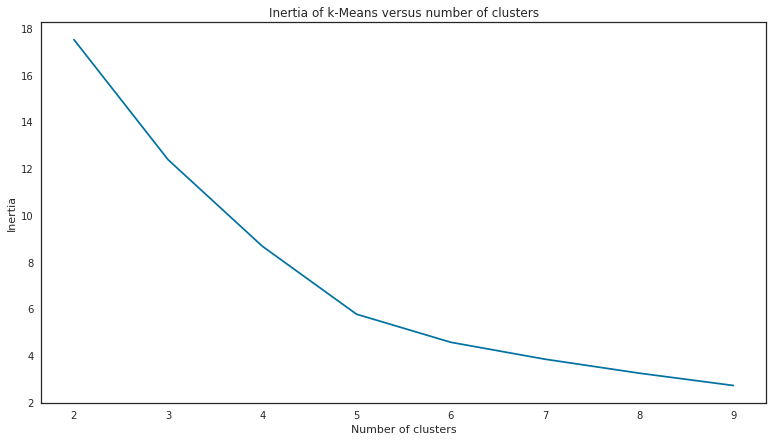

In [ ]:
scores1 = [KMeans(n_clusters=i+2, random_state=11).fit(X_pca).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores1)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
model1 = KMeans(random_state=11, n_clusters=5)
model1.fit(X_pca)

KMeans(n_clusters=5, random_state=11)

Text(0.5, 0, 'PC1')

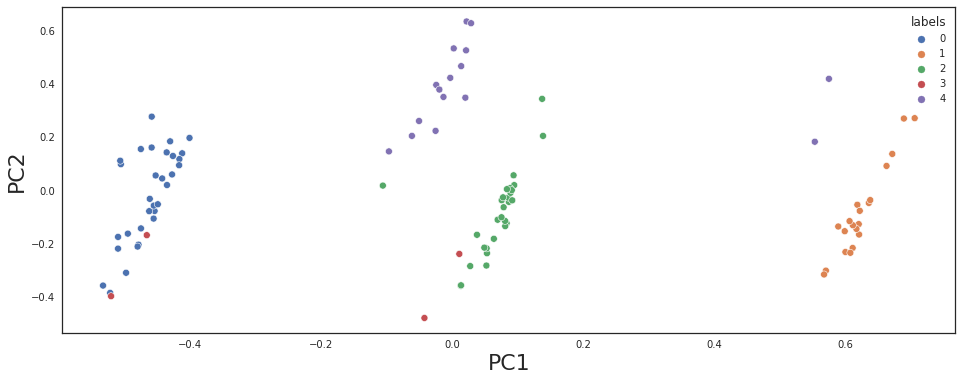

In [ ]:
cluster_labels = model1.predict(X_pca)
# Making label column
df_cluster['labels'] = cluster_labels
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y=X_pca[:,1],x=X_pca[:,0],data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('PC2',fontdict={'size':22})
plt.xlabel('PC1',fontdict={'size':22})

In [ ]:
df_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
df_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
df_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
df_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
df_4 = df_cluster[df_cluster['labels'] == 4].reset_index()
list_of_df = [df_0,df_1,df_2,df_3,df_4]
# Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_df):
  print(f'Top Cuisines in Cluster {i} \n', df.drop(['index','Name','Cost','Rating','labels','Restaurant'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')

Top Cuisines in Cluster 0 
 northindian                      3
icecreamdesserts                 2
southindiannorthindianchinese    2
dtype: int64 

Top Cuisines in Cluster 1 
 northindianitalianfingerfood            1
northindianmediterraneaneuropean        1
northindiancontinentalchineseitalian    1
dtype: int64 

Top Cuisines in Cluster 2 
 cafedessertsfastfood      1
northindiancontinental    1
cafedesserts              1
dtype: int64 

Top Cuisines in Cluster 3 
 northindianchinese                     4
american                               0
modernindianasiancontinentalitalian    0
dtype: int64 

Top Cuisines in Cluster 4 
 northindianchinesecontinental       2
american                            1
mediterraneannorthindiankebabbbq    1
dtype: int64 



## 9. Future Work (Optional)

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After implementing the algorithms, I've come across that XGBoost and SVM both models without hyperparameter tuning (observed that no improvement in model after hyperparameter tuning) are faster and better than other models. However, SVM is slightly faster than XGB by few seconds. This in turn helps to conclude that SVM Model is more efficient and reliable in sentiment analysis than other models.

For clustering Principal Component Analysis (PCA) is found to be better than K-Means clustering.

There's always a room for the improvement and a lot more to explore. At this point, here are a few things we could do to improve our model:
* As we have 10000 reviews in the dataset, we can add more data to get more improved results.
* We can use Logistic Regression, Naives Bayse, K-Nearest Neighbors and Decision Tree to checl if we can get better result than the selected SVM model.

Here are some points which can help the businesses using this analysis:
* Zomato can promote North Indian Food, Chinese Food and Fast Food as these are most served cuisines.
* Using EDA insights customer can compare restaurant cost including ratings and reviews before ordering their food.
* Classification and Clustering analysis can help Zomato in categorising cuisine, restaurant and their customers.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***